In [65]:
from ela_feature_definition import ela_feature_names
import pandas as pd
import random
import numpy as np

In [74]:
def set_random_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_random_seed(42)

In [75]:
ela = pd.read_csv('data/aggregated_ela_representation_dropna.csv',index_col=[0,1,2])

In [76]:
ela.shape

(221, 63)

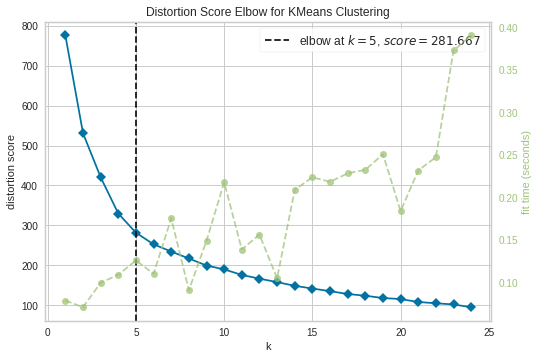

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ela_scaled=scaler.fit_transform(ela)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,25))
visualizer.fit(ela_scaled)     
visualizer.show()

In [78]:
kmeans = KMeans(n_clusters=visualizer.elbow_value_)

In [79]:
ela['cluster']=kmeans.fit_predict(ela_scaled)

In [80]:
ela.to_csv('data/aggregated_ela_with_kmeans_cluster.csv')